#  UnSupervised Machine Learning
- UnSupervised Machine Learning works with unlabeled data.
- It is used to find patterns without predefined outputs.
  
## There are 3 Categories:
- Clustering
- Association Rule minig
- Dimension reduction

# 1 : Clustering
- Clustering Algorithms group similiar data points.
- The goal is to identify natural grouping in the data.

## Types of Clustering
- There are multiple types of Clustering based on methods:
- Centroid-based methods
- Distribution based
- connectivity based
- density based

# 1. Centroid-based methods
- Represented Clusters using central points
- K-means Clustering

# 2. Distribution based
- Guassian Mixture models(GMMs)

# 3. Connectivity based models
- Hiearhical clustering : Builds a tree like structure by merging or splitting clusters.

# 4. Density Based
- DBSCAN(Density Based):  they form clusters based on density.

# 2. Association Rule
-  Finding patterns between items in large datasets:
-  MBA( Market Basket Analysis) : if a person buys butter he may also buy bread.

# 3. Dimensionality Reduction
- Dimension Reduction means when we have a large dataset with too many features, that can cause issues like overfitting or low accuracy
- It helps in reducing the number of features while retaining our key info.

#  Clustering

## K - Means Clustering:  
- It is a unsupervised machine learning algorithm which groups unlabeled dataset into different clusters.
- It is used to organize data into groups based on their features ( Similarity)

In [1]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 0.60, random_state = 42)

In [4]:
X.shape

(500, 2)

In [5]:
y_true.shape

(500,)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

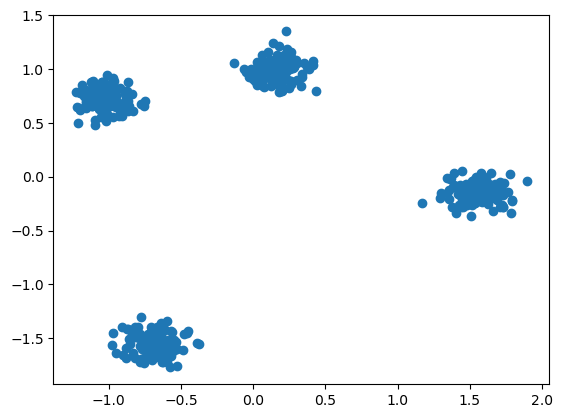

In [7]:
plt.scatter ( X_scaled[:, 0],X_scaled[:, 1])
plt.show()

# K-means clustering

In [8]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [9]:
kmeans.fit(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [11]:
labels = kmeans.labels_

In [12]:
centroids = kmeans.cluster_centers_

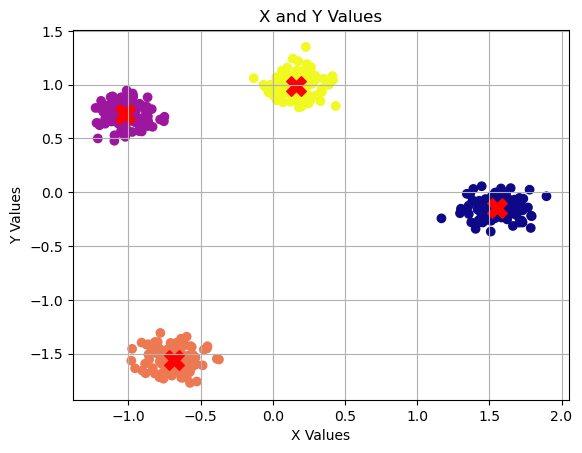

In [23]:
plt.scatter ( X_scaled[:, 0],X_scaled[:, 1], c = labels, cmap = 'plasma')
plt.scatter ( centroids[:, 0],centroids[:, 1], c = 'red', marker = "X", s = 200, label = 'centroids')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("X and Y Values")
plt.grid()
plt.show()

# Unsupervised ML
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM

In [9]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
data

[['milk', 'bread', 'butter'],
 ['bread', 'butter'],
 ['milk', 'bread'],
 ['milk', 'bread', 'jam', 'butter'],
 ['bread', 'jam']]

In [30]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 476.3 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 986.4 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 2.6 MB/s eta 0:00:01
   -----------------------------

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
data = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam', 'butter'],
    ['bread', 'jam']
]

In [28]:
te =  TransactionEncoder()

In [29]:
te.ary= te.fit(data).transform(data)

In [30]:
df = pd.DataFrame(te.ary,columns = te.columns_)

In [31]:
df.head()

,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,True,True,True
4,True,False,True,False


In [32]:
df.isnull().sum()

bread     0
butter    0
jam       0
milk      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   bread   5 non-null      bool 
 1   butter  5 non-null      bool 
 2   jam     5 non-null      bool 
 3   milk    5 non-null      bool 
dtypes: bool(4)
memory usage: 152.0 bytes


In [34]:
df.columns

Index(['bread', 'butter', 'jam', 'milk'], dtype='object')

In [35]:
df.shape

(5, 4)

In [36]:
df.describe().T

,count,unique,top,freq
bread,5,1,True,5
butter,5,2,True,3
jam,5,2,False,3
milk,5,2,True,3


# Step 3
## Applying Apriori Algo to find frequent items

In [37]:
items = apriori(df,min_support = 0.6, use_colnames = True)

## Generating Association Rules 

In [38]:
rules = association_rules(items, metric = 'confidence', min_threshold = 0.7)

C:\Users\ASIF MANZOOR\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Show the rules

In [39]:
print(items)

   support         itemsets
0      1.0          (bread)
1      0.6         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)
4      0.6    (milk, bread)


In [41]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(butter),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8
1,(milk),(bread),0.6,1.0,0.6,1.0,1.0,1.0,0.0,inf,0.0,0.6,0.0,0.8


# UNSUPERVISED ALGORITHMS
## Association Rule mining (e.g MBA (MARKET BASKET ANALYSIS)
### APRIORI ALGORITHM ON Retail Dataset

## Step 1
## Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2
## Imorting Dataset

In [45]:
data = pd.read_csv("online_retail.csv")

# Step 3
## Data Exploration 

In [46]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
data.shape

(541909, 8)

In [50]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [51]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Step 4
## Data Preprocessesing


In [52]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [53]:
data.dropna(inplace = True)

In [54]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [55]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [56]:
data = data[data["Quantity"]> 0]

In [57]:
data['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [58]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [59]:
data = data[data["Country"] != 'Unspecified']

In [60]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [61]:
data['InvoiceDate'].unique()

array(['2010-12-01 08:26:00', '2010-12-01 08:28:00',
       '2010-12-01 08:34:00', ..., '2011-12-09 12:31:00',
       '2011-12-09 12:49:00', '2011-12-09 12:50:00'], dtype=object)

In [62]:
basket = data.groupby(['InvoiceDate', 'Description'])['Quantity'].sum().unstack().fillna(0)

basket = basket.applymap(lambda x:1 if x>0 else 0)

C:\Users\ASIF MANZOOR\AppData\Local\Temp\ipykernel_80392\3440468580.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x:1 if x>0 else 0)


In [63]:
data['Quantity'].unique()


array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [64]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)


## Applying Apriori Algo 

In [67]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket,min_support=0.02, use_colnames=True)

C:\Users\ASIF MANZOOR\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [68]:
frequent_items.head()

,support,itemsets
0,0.023092,(3 STRIPEY MICE FELTCRAFT)
1,0.020892,(4 TRADITIONAL SPINNING TOPS)
2,0.041901,(6 RIBBONS RUSTIC CHARM)
3,0.020487,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.026738,(60 CAKE CASES VINTAGE CHRISTMAS)


In [80]:
#sort
print(frequent_items.sort_values(by='support',ascending = True).head(10))

      support                              itemsets
131  0.059378     (PACK OF 72 RETROSPOT CAKE CASES)
107  0.060652             (LUNCH BAG  BLACK SKULL.)
157  0.063024                             (POSTAGE)
189  0.065976   (SET OF 3 CAKE TINS PANTRY DESIGN )
114  0.073789             (LUNCH BAG RED RETROSPOT)
14   0.078824       (ASSORTED COLOUR BIRD ORNAMENT)
140  0.079345                       (PARTY BUNTING)
92   0.091903             (JUMBO BAG RED RETROSPOT)
174  0.097749            (REGENCY CAKESTAND 3 TIER)
219  0.113085  (WHITE HANGING HEART T-LIGHT HOLDER)


In [81]:
#sort
print(frequent_items.sort_values(by='support',ascending = False).head(10))

      support                              itemsets
219  0.113085  (WHITE HANGING HEART T-LIGHT HOLDER)
174  0.097749            (REGENCY CAKESTAND 3 TIER)
92   0.091903             (JUMBO BAG RED RETROSPOT)
140  0.079345                       (PARTY BUNTING)
14   0.078824       (ASSORTED COLOUR BIRD ORNAMENT)
114  0.073789             (LUNCH BAG RED RETROSPOT)
189  0.065976   (SET OF 3 CAKE TINS PANTRY DESIGN )
157  0.063024                             (POSTAGE)
107  0.060652             (LUNCH BAG  BLACK SKULL.)
131  0.059378     (PACK OF 72 RETROSPOT CAKE CASES)


In [82]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.8)

In [72]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032178,0.039875,0.026622,0.827338,20.748295,1.0,0.025339,5.560724,0.983448,0.585987,0.820167,0.747486
1,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.025233,0.039875,0.022571,0.894495,22.432491,1.0,0.021565,9.100315,0.980154,0.530612,0.890114,0.730267
2,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026622,0.044968,0.022571,0.847826,18.854037,1.0,0.021374,6.275925,0.972860,0.460449,0.840661,0.674878


In [73]:
print(rules[['antecedents','consequents','support', 'confidence','lift']].sort_values(by='confidence', ascending = False).head())

                                         antecedents  \
1  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
2  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
0                   (PINK REGENCY TEACUP AND SAUCER)   

                          consequents   support  confidence       lift  
1   (GREEN REGENCY TEACUP AND SAUCER)  0.022571    0.894495  22.432491  
2  (ROSES REGENCY TEACUP AND SAUCER )  0.022571    0.847826  18.854037  
0   (GREEN REGENCY TEACUP AND SAUCER)  0.026622    0.827338  20.748295  


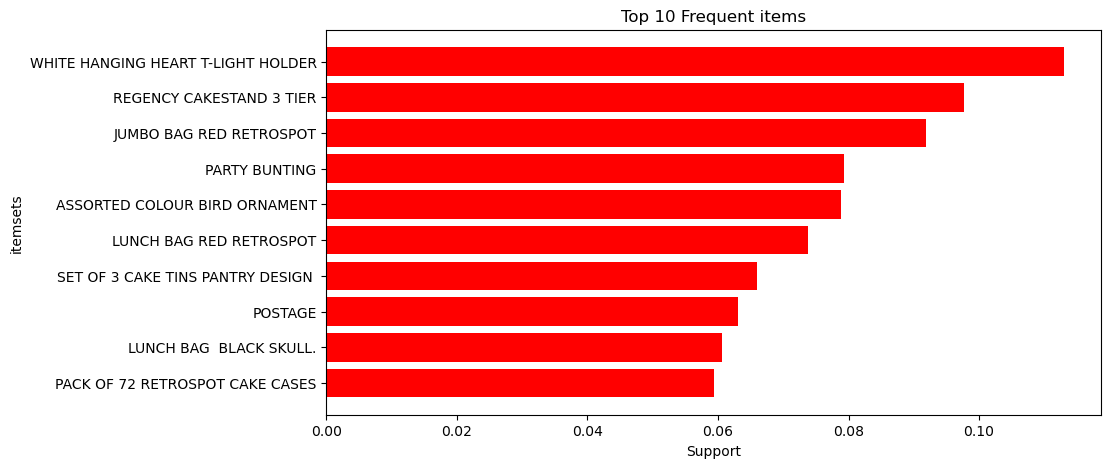

In [92]:
#Visualization
import matplotlib.pyplot as plt

top_items= frequent_items.sort_values(by='support',ascending = True).head(10)
top_items['itemsets']= top_items['itemsets'].apply(lambda x: ','.join(list(x)))
plt.figure(figsize=(10,5))
plt.barh(top_items['itemsets'], top_items['support'], color ='red')
plt.xlabel("Support")
plt.ylabel("itemsets")
plt.title("Top 10 Frequent items")
plt.show()

In [98]:
#support vs confidence
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='support', y='confidence', size='lift',sizes(20,200), data=rules)
plt.xlabel("support")
plt.ylabel("confidence")
plt.grid()
plt.show()

SyntaxError: positional argument follows keyword argument (1544285939.py, line 4)